In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import re
import igraph as ig
plt.style.use('ggplot')

In [2]:
hashtag = 'lgbt'

In [3]:
file_path = f'../data/hashtags/edges/{hashtag}_edges.txt'
try:
    G = nx.read_edgelist(file_path, delimiter=',', create_using=nx.DiGraph())
except FileNotFoundError:
    print(f"File not found: {file_path}")


In [4]:
print(G.nodes())

['https://www.tiktok.com/@thetylerherron/video/7375306205016755498', 'https://www.tiktok.com/@wigglyspine/video/7374384546621541664\r', 'https://www.tiktok.com/@matthewsplace1/video/7375302514322836782', 'None\r', 'https://www.tiktok.com/@jacklooman/video/7375300207849819435', 'https://www.tiktok.com/@lps_and_gacha_/video/7375286351031192878\r', 'https://www.tiktok.com/@bigbadgirlyman/video/7375299489583615274', 'https://www.tiktok.com/@rebelats0ul/video/7375001137881074986\r', 'https://www.tiktok.com/@ndirishclover/video/7375297629158214955', 'https://www.tiktok.com/@meghanley6/video/7370808509220343072\r', 'https://www.tiktok.com/@genericgaymerdude/video/7375286332123401505', 'https://www.tiktok.com/@byspencerthomas/video/7374964981382778158\r', 'https://www.tiktok.com/@snakebeasst69/video/7375278671193460011', 'https://www.tiktok.com/@chrisdmowrey/video/7374948759366569262\r', 'https://www.tiktok.com/@milo.g.official/video/7375267804401978657', 'https://www.tiktok.com/@tempestdaybre

<BarContainer object of 16 artists>

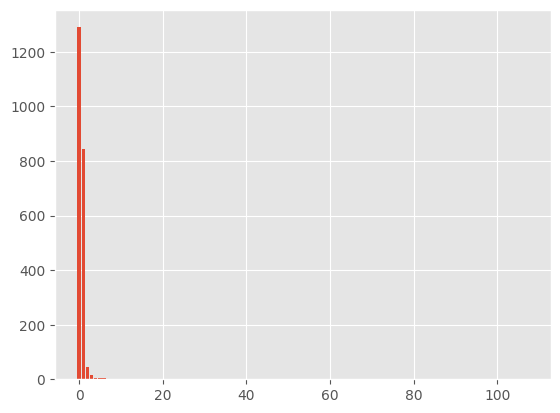

In [5]:
fig, ax = plt.subplots()
degree_sequence = degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))

In [6]:
np.unique(degree_sequence, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  13,  16,  17,
         24,  29, 107]),
 array([1290,  845,   46,   16,    3,    5,    4,    1,    1,    1,    2,
           1,    1,    1,    1,    1], dtype=int64))

In [7]:
largest_cc = max(nx.connected_components(nx.to_undirected(G)), key=len)

In [8]:
with open(f'../data/hashtags/edges/{hashtag}_edges.txt', 'r') as f:
    edges_raw = f.readlines()

In [9]:
edges_url = [edge.strip().split(',') for edge in edges_raw if 'None' not in edge.strip().split(',')]

In [10]:
expression = re.compile(r'(@.*)')
edges = []
for edge in edges_raw:
    try:
        stitcher, stitchee = edge.strip().split(',')
        stitcher = re.findall(expression, stitcher)[0]
        stitchee = re.findall(expression, stitchee)[0]
        edges.append((stitcher, stitchee))
    except IndexError:
        continue

In [11]:
edges.sort()

In [12]:
# Load in sentiment of hashtag
with open(f'../data/hashtags/videos/sentiments/{hashtag}_sentiment.txt', 'r') as f:
    sentiment = f.readlines()

In [13]:
# Load sentiment in as tuples of (video_id, sentiment), every 4 lines theres a new video, the second line of each is the id, the third line is the sentiment
sentiment = [(sentiment[i].strip(), sentiment[i+1].strip()) for i in range(1, len(sentiment), 4)]

In [14]:
sentiment[:5]

[('Video: @.autarex_video_7371190217916681514-Scene-001.mp4', 'positive'),
 ('Video: @.autarex_video_7371190217916681514-Scene-002.mp4', 'neutral'),
 ('Video: @0316amberlicious_video_7371105726032366854-Scene-001.mp4',
  'neutral'),
 ('Video: @0316amberlicious_video_7371105726032366854-Scene-002.mp4',
  'positive'),
 ('Video: @0ctober.bby_video_7370948726287797547-Scene-001.mp4', 'neutral')]

In [15]:
# remove tuple if first element contains '-Scene-002.mp4'
sentiment = [s for s in sentiment if '-Scene-002.mp4' not in s[0]]

In [16]:
# Function to modify the sentiment list elements
def modify_sentiment(sentiment):
    modified_sentiment = []
    
    for s in sentiment:
        # Extract video ID and username from sentiment entry
        video_id_part = s[0].split('_')[-1].split('-')[0]  # Extract the video ID
        username = s[0].split('_')[0].split(': ')[1].replace('_', '/')  # Extract and format username

        # Construct the new string to match edges format
        new_entry = f"('{username}/video/{video_id_part}', {s[1]})"
        modified_sentiment.append(new_entry)
    
    return modified_sentiment

# Modify the sentiment list
modified_sentiment = modify_sentiment(sentiment)

In [17]:
#turn modified sentiment elements into tuples
modified_sentiment = [tuple(s.split(',')) for s in modified_sentiment]

In [18]:
#strip the first element of each tuple of the first two characters and the last character
modified_sentiment = [(s[0][2:-1], s[1]) for s in modified_sentiment]

In [19]:
#strip the last element of each tuple of the first and last character
modified_sentiment = [(s[0], s[1][1:-1]) for s in modified_sentiment]

In [20]:
sentiment = modified_sentiment

In [21]:
len(sentiment)

1268

In [22]:
len(edges)*2

2366

In [23]:
#from natsort import os_sorted
#edges = os_sorted(edges)
#sentiment = os_sorted(sentiment)

In [24]:
sentiment[:20]

[('@.autarex/video/7371190217916681514', 'positive'),
 ('@0316amberlicious/video/7371105726032366854', 'neutral'),
 ('@0ctober.bby/video/7370948726287797547', 'neutral'),
 ('@12amcoconut/video/7368964759758146847', 'neutral'),
 ('@2mummies/video/7372869316984737056', 'neutral'),
 ('@2peaceful2b/video/7367782229218463018', 'neutral'),
 ('@2peaceful2b/video/7368455452104903979', 'positive'),
 ('@2peaceful2b/video/7370363941609901354', 'neutral'),
 ('@2peaceful2b/video/7373283180968742186', 'neutral'),
 ('@2peaceful2b/video/7374789672700038443', 'negative'),
 ('@702cee/video/7371540289028312366', 'negative'),
 ('@a.is.for.alex/video/7372263868602633515', 'neutral'),
 ('@a.lly.cat/video/7365983259651525918', 'positive'),
 ('@a.shay.a/video/7370499053622447406', 'neutral'),
 ('@accrualworld87/video/7368214839208037665', 'positive'),
 ('@accrualworld87/video/7370992030341811488', 'neutral'),
 ('@accrualworld87/video/7372302183754157344', 'neutral'),
 ('@accrualworld87/video/73726809196074304

In [25]:
edges[:5]

[('@.autarex/video/7371190217916681514',
  '@777ayonna/video/7368185881561287978'),
 ('@0316amberlicious/video/7371105726032366854',
  '@paulgz_/video/6957226906567625989'),
 ('@0bsidian____/video/7365134417104325918',
  '@bambinoootalks/video/7364618082796506398'),
 ('@0bsidian____/video/7371650643100011818',
  '@ms.mawma/video/7371135200484461866'),
 ('@0ctober.bby/video/7370948726287797547',
  '@thesundaye/video/7370878598065982766')]

In [26]:
user_sentiment = sentiment
user_edges = edges

In [27]:
#keep only the part of both elements in each tuple of edges that come after video/
edges = [(s[0].split('video/')[1], s[1].split('video/')[1]) for s in edges]

In [28]:
#keep only the part of the first element in each tuple of sentiment that comes after video/
sentiment = [(s[0].split('video/')[1], s[1]) for s in sentiment]

In [29]:
edges[100:120]

[('7374947296074534187', '7368171731598511402'),
 ('7373524332896603424', '7367026148145892640'),
 ('7363830267456343326', '7363294356071075115'),
 ('7363848072964607263', '7363583494842240288'),
 ('7364545968248835358', '7364397730967375150'),
 ('7367063447814606111', '7365615628943707435'),
 ('7371160336805924142', '7361913926478482734'),
 ('7373650806505098538', '7373036202141797675'),
 ('7374837719932882218', '7374759397458824481'),
 ('7364370619971947808', '7359492066004471072'),
 ('7364637128506002720', '7364497697757220139'),
 ('7372262721695255851', '7364405862200331566'),
 ('7373410790923111722', '7372281851290996011'),
 ('7364902132719422762', '7364584020379716906'),
 ('7364617572815359278', '7364444878434028831'),
 ('7371353088973606176', '7357474409906539808'),
 ('7363981568878152968', '7363637915240369409'),
 ('7367808755494423850', '7367803532935777579'),
 ('7365553019796147499', '7106567934226566443'),
 ('7375299489583615274', '7375001137881074986')]

In [30]:
sentiment[:5]

[('7371190217916681514', 'positive'),
 ('7371105726032366854', 'neutral'),
 ('7370948726287797547', 'neutral'),
 ('7368964759758146847', 'neutral'),
 ('7372869316984737056', 'neutral')]

In [31]:
#only keep the first instance of each video in the sentiment list
print(len(sentiment))
sentiment = list(set(sentiment))
print(len(sentiment))

1268
1268


In [32]:
# Replace every second tuple's first element with the matching video ID from edges
#for i in range(len(sentiment)):
#    for edge in edges:
        
        # Compare the video IDs and replace when match is found
#        if i % 2 == 1:
            # Debugging: print what's being compared
            #print(f"Comparing sentiment[{i}] = {sentiment[i][0]} with edge[1] = {edge[1]} and sentiment[{i-1}] = {sentiment[i-1][0]} with edge[0] = {edge[0]}")
        
#            if sentiment[i][0] == edge[0] and sentiment[i-1][0] == edge[0]:
                # Replace the first element in the current tuple with the first element from edges
#                sentiment[i] = (edge[1], sentiment[i][1])
                #print(f"Match found! Updated sentiment[{i}] = {sentiment[i]}")
#                break  # If a match is found, no need to check further edges for this sentiment entry


In [33]:
sentiment[:20]

[('7367374983573638432', 'positive'),
 ('7365900753505914144', 'positive'),
 ('7374851851637787946', 'neutral'),
 ('7366634055514770734', 'neutral'),
 ('7368110927650016554', 'neutral'),
 ('7364831375976844586', 'positive'),
 ('7364940912771812638', 'negative'),
 ('7369038508876451115', 'neutral'),
 ('7365991007525063978', 'positive'),
 ('7364674983274204462', 'neutral'),
 ('7364836026629590314', 'neutral'),
 ('7372199798268497184', 'positive'),
 ('7371540289028312366', 'negative'),
 ('7370613521832299818', 'neutral'),
 ('7370896064838143278', 'neutral'),
 ('7365153686802271530', 'neutral'),
 ('7366550147230076193', 'neutral'),
 ('7365977783433972998', 'positive'),
 ('7372022808471276843', 'neutral'),
 ('7366792268293901598', 'positive')]

In [34]:
edges[:10]

[('7371190217916681514', '7368185881561287978'),
 ('7371105726032366854', '6957226906567625989'),
 ('7365134417104325918', '7364618082796506398'),
 ('7371650643100011818', '7371135200484461866'),
 ('7370948726287797547', '7370878598065982766'),
 ('7368964759758146847', '7257657752217029934'),
 ('7367782229218463018', '7364100263071812906'),
 ('7368455452104903979', '7361803042376650026'),
 ('7370363941609901354', '7342625720683793707'),
 ('7373283180968742186', '7347443158319418666')]

In [35]:
#print the sentiment instances that occur more than twice
from collections import Counter

sentiment_counter = Counter([video[0] for video in sentiment])

for key, value in sentiment_counter.items():
    if value > 1:
        print(key, value)


In [36]:
#print the sentiments of the videos that occur more than twice
for key, value in sentiment_counter.items():
    if value > 1:
        print([video for video in sentiment if video[0] == key])

In [37]:
G_video = ig.Graph().as_directed()
for s, t in edges:
    G_video.add_vertex(s)
    G_video.add_vertex(t)
    G_video.add_edge(s, t)

In [38]:
# add sentiment as a vertex attribute to the graph from the sentiment list using the video ID as the key
count = 0
for i in range(len(sentiment)):
    try:
        G_video.vs.find(name=sentiment[i][0])['sentiment'] = sentiment[i][1]
    except ValueError:
        print(f"Node {sentiment[i][0]} not found in the graph.", i)
        count += 1
print(count)

Node 7364836026629590314 not found in the graph. 10
Node 7373375640021503275 not found in the graph. 28
Node 7366245219035106593 not found in the graph. 30
Node 7372783587076115755 not found in the graph. 34
Node 7363854066201480490 not found in the graph. 43
Node 7371870012828749102 not found in the graph. 68
Node 7367856734171335942 not found in the graph. 75
Node 7371766661986192672 not found in the graph. 114
Node 7372273674264661291 not found in the graph. 126
Node 7373735573749615915 not found in the graph. 134
Node 7371834580229246241 not found in the graph. 139
Node 7371627789243387178 not found in the graph. 158
Node 7368715612119518506 not found in the graph. 168
Node 7375267804401978657 not found in the graph. 178
Node 7373722059286809899 not found in the graph. 189
Node 7367598374310268165 not found in the graph. 208
Node 7370417847668985131 not found in the graph. 211
Node 7371265960713538822 not found in the graph. 214
Node 7367606997308460321 not found in the graph. 217


In [39]:
# print the first 5 vertices of the graph with their attributes
for i in range(20):
    print(G_video.vs[i].attributes())

{'name': '7371190217916681514', 'sentiment': 'positive'}
{'name': '7368185881561287978', 'sentiment': None}
{'name': '7371105726032366854', 'sentiment': 'neutral'}
{'name': '6957226906567625989', 'sentiment': None}
{'name': '7365134417104325918', 'sentiment': None}
{'name': '7364618082796506398', 'sentiment': None}
{'name': '7371650643100011818', 'sentiment': None}
{'name': '7371135200484461866', 'sentiment': None}
{'name': '7370948726287797547', 'sentiment': 'neutral'}
{'name': '7370878598065982766', 'sentiment': None}
{'name': '7368964759758146847', 'sentiment': 'neutral'}
{'name': '7257657752217029934', 'sentiment': None}
{'name': '7367782229218463018', 'sentiment': 'neutral'}
{'name': '7364100263071812906', 'sentiment': None}
{'name': '7368455452104903979', 'sentiment': 'positive'}
{'name': '7361803042376650026', 'sentiment': None}
{'name': '7370363941609901354', 'sentiment': 'neutral'}
{'name': '7342625720683793707', 'sentiment': None}
{'name': '7373283180968742186', 'sentiment': 

In [40]:
components = G_video.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 2]#make 2 for filtering graph to only show components with more than 2 nodes
G_video_sub = G_video.subgraph(sum(components_filtered, []))

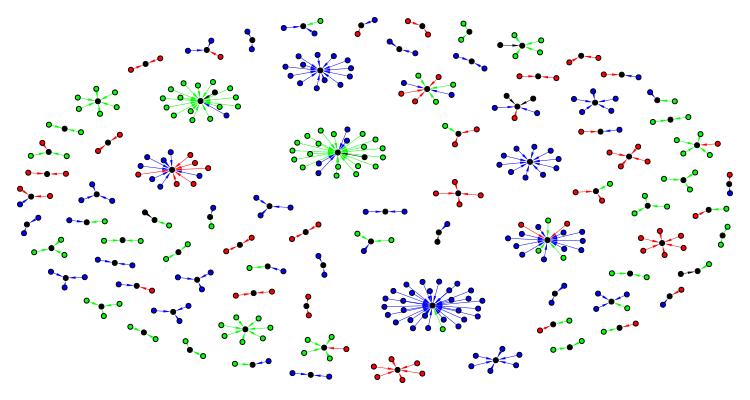

In [41]:
#display largest connected component with sentiment as vertex attribute, color nodes by sentiment, positive as green, negative as red, neutral as black
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["layout"] = G_video_sub.layout("fr")
visual_style["bbox"] = (750, 400)
visual_style["margin"] = 20
visual_style["vertex_color"] = ['green' if sentiment == 'positive' else 'red' if sentiment == 'negative' else 'blue' if sentiment == 'neutral' else 'black' for sentiment in G_video_sub.vs['sentiment']]
visual_style["edge_color"] = ['green' if G_video_sub.vs[edge.source]['sentiment'] == 'positive' else 'red' if G_video_sub.vs[edge.source]['sentiment'] == 'negative' else 'blue' if G_video_sub.vs[edge.source]['sentiment'] == 'neutral' else 'black' for edge in G_video_sub.es]
visual_style["edge_width"] = 0.5
visual_style["edge_arrow_size"] = 0.5
visual_style["edge_arrow_width"] = 0.5
visual_style["vertex_frame_color"] = 'black'
visual_style["vertex_shape"] = 'circle'

ig.plot(G_video_sub, **visual_style)

In [42]:
# keep only the usernames from the user_edges list
user_edges = [(s[0].split('/')[0], s[1].split('/')[0]) for s in user_edges]

In [43]:
# keep only the usernames from the user_sentiment list
user_sentiment = [(s[0].split('/')[0], s[1]) for s in user_sentiment]

In [104]:
G_user = ig.Graph().as_directed()
for s, t in user_edges:
    G_user.add_vertex(s)
    G_user.add_vertex(t)
    G_user.add_edge(s, t)

In [105]:
components = G_user.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 2]#make 2 for filtering graph to only show components with more than 2 nodes
G_user_sub = G_user.subgraph(sum(components_filtered, []))

In [106]:
#print the sentiment instances that occur more than twice
from collections import Counter

sentiment_counter = Counter([video[0] for video in user_sentiment])

for key, value in sentiment_counter.items():
    if value > 1:
        print(key, value)


@2peaceful2b 5
@accrualworld87 5
@adamgaston 2
@ajay.plants 3
@aj 2
@alannastarby 3
@alexjakesc 2
@anarchyrising420 2
@andreia 2
@ash 2
@astoldbyzhane 2
@bangtaning 2
@bearbie.tv 3
@bearded 7
@billynomates.1988 5
@bingoloverxxx 2
@bradirl 2
@brailinsoreal 7
@casseystarcevic 2
@charlesinchargeiowa 2
@charliegrossnielsen 2
@cheugyneat 2
@chrisbradford33 2
@colleenisqueen 2
@crynotcriorchy 2
@daniela 9
@daydaythemua 4
@deku 2
@dinnah84 2
@drxpeppergirl 2
@dvnielbon 3
@dylan 3
@elliothaenhaven 3
@elodieseverything 3
@emgeebeee 2
@emilymatan 2
@faultywiring0709 4
@faythegay 2
@felixwolftunez 2
@fenny 3
@findingmyvoice92 2
@finleybear3471 2
@flowerfox721 2
@foxandthepound 3
@foxxykf 6
@fur 5
@gbaddie14 2
@gen 2
@gracegrayandmaddie 3
@h.arroway 9
@harper 3
@headempty 5
@heatherinphincity 2
@hello 3
@hjulrich 7
@iamizaiahhh 5
@ineedafrankalbum 2
@inoru.y.morris 14
@isaiahgripper 2
@itsjeremybryan 2
@iviimon 2
@jacklooman 9
@jackofspades050 2
@jarey26.4 2
@jennaclaire3 2
@joeymacmusic 3
@jossie

In [107]:
# Determine the most frequent sentiment for each node
most_frequent_sentiment = {}
for video, count in sentiment_counter.items():
    sentiments = [s[1] for s in user_sentiment if s[0] == video]
    most_common_sentiment = max(set(sentiments), key=sentiments.count)
    most_frequent_sentiment[video] = most_common_sentiment


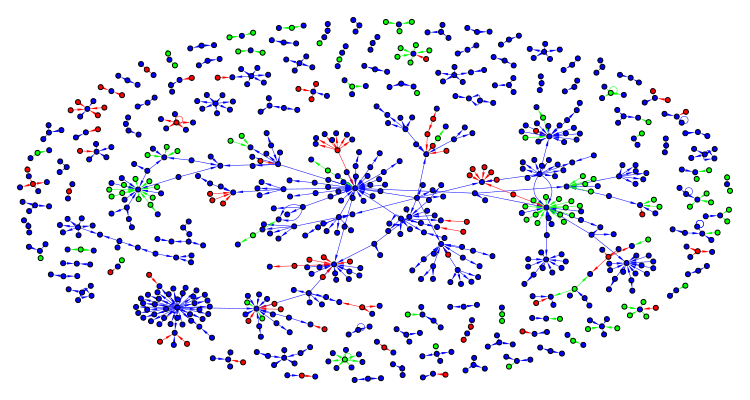

In [108]:

# Update the visual style to color nodes and edges based on the most frequent sentiment
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["layout"] = G_user_sub.layout("fr")
visual_style["bbox"] = (750, 400)
visual_style["margin"] = 20
visual_style["vertex_color"] = ['green' if most_frequent_sentiment.get(vertex['name'], 'neutral') == 'positive' else 
                                'red' if most_frequent_sentiment.get(vertex['name'], 'neutral') == 'negative' else 
                                'blue' if most_frequent_sentiment.get(vertex['name'], 'neutral') == 'neutral' else 
                                'black' for vertex in G_user_sub.vs]
visual_style["edge_color"] = ['green' if most_frequent_sentiment.get(G_user_sub.vs[edge.source]['name'], 'neutral') == 'positive' else 
                              'red' if most_frequent_sentiment.get(G_user_sub.vs[edge.source]['name'], 'neutral') == 'negative' else 
                              'blue' if most_frequent_sentiment.get(G_user_sub.vs[edge.source]['name'], 'neutral') == 'neutral' else 
                              'black' for edge in G_user_sub.es]
visual_style["edge_width"] = 0.5
visual_style["edge_arrow_size"] = 0.5
visual_style["edge_arrow_width"] = 0.5
visual_style["vertex_frame_color"] = 'black'
visual_style["vertex_shape"] = 'circle'

ig.plot(G_user_sub, **visual_style)

In [109]:
# using the sentiment list, create a list of tuples with the sentiment of each video, the username of the video, and the incoming user
sentiment_user = [(s[1], s[0].split('/')[0], t[0]) for s, t in zip(user_sentiment, user_edges)]

sentiment_user[:20]

[('positive', '@.autarex', '@.autarex'),
 ('neutral', '@0316amberlicious', '@0316amberlicious'),
 ('neutral', '@0ctober.bby', '@0bsidian____'),
 ('neutral', '@12amcoconut', '@0bsidian____'),
 ('neutral', '@2mummies', '@0ctober.bby'),
 ('neutral', '@2peaceful2b', '@12amcoconut'),
 ('positive', '@2peaceful2b', '@2peaceful2b_bothered'),
 ('neutral', '@2peaceful2b', '@2peaceful2b_bothered'),
 ('neutral', '@2peaceful2b', '@2peaceful2b_bothered'),
 ('negative', '@2peaceful2b', '@2peaceful2b_bothered'),
 ('negative', '@702cee', '@2peaceful2b_bothered'),
 ('neutral', '@a.is.for.alex', '@702cee'),
 ('positive', '@a.lly.cat', '@___slater'),
 ('neutral', '@a.shay.a', '@_callmelars'),
 ('positive', '@accrualworld87', '@_junaluv_'),
 ('neutral', '@accrualworld87', '@_lorimusic'),
 ('neutral', '@accrualworld87', '@_motivatedki'),
 ('positive', '@accrualworld87', '@_piercedthrutheheart_'),
 ('neutral', '@accrualworld87', '@_princess_opossum'),
 ('neutral', '@adamclayton', '@_tatted.ginger_')]

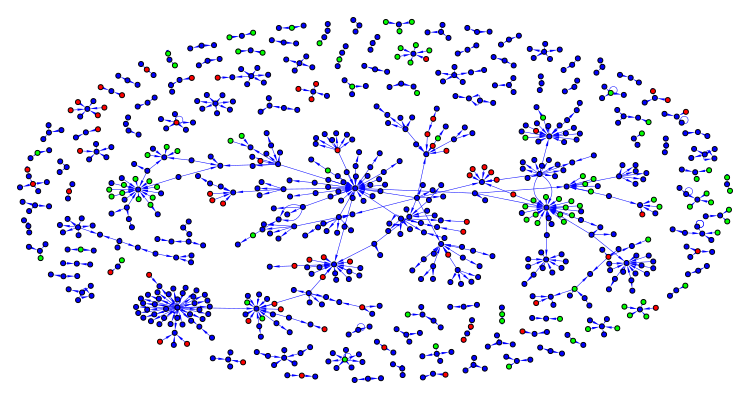

In [110]:
# Update vertex colors based on most_frequent_sentiment
visual_style["vertex_color"] = ['green' if most_frequent_sentiment.get(vertex['name'], 'neutral') == 'positive' else 
                                'red' if most_frequent_sentiment.get(vertex['name'], 'neutral') == 'negative' else 
                                'blue' if most_frequent_sentiment.get(vertex['name'], 'neutral') == 'neutral' else 
                                'black' for vertex in G_user_sub.vs]

# Create a dictionary to map edge tuples to their sentiment
edge_sentiment_dict = {(s[1], s[2]): s[0] for s in sentiment_user}

# Update edge colors based on sentiment_user
visual_style["edge_color"] = ['green' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'neutral') == 'positive' else 
                              'red' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'neutral') == 'negative' else 
                              'blue' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'neutral') == 'neutral' else 
                              'black' for edge in G_user_sub.es]

ig.plot(G_user_sub, **visual_style)


In [111]:
edge_sentiment_dict

{('@.autarex', '@.autarex'): 'positive',
 ('@0316amberlicious', '@0316amberlicious'): 'neutral',
 ('@0ctober.bby', '@0bsidian____'): 'neutral',
 ('@12amcoconut', '@0bsidian____'): 'neutral',
 ('@2mummies', '@0ctober.bby'): 'neutral',
 ('@2peaceful2b', '@12amcoconut'): 'neutral',
 ('@2peaceful2b', '@2peaceful2b_bothered'): 'negative',
 ('@702cee', '@2peaceful2b_bothered'): 'negative',
 ('@a.is.for.alex', '@702cee'): 'neutral',
 ('@a.lly.cat', '@___slater'): 'positive',
 ('@a.shay.a', '@_callmelars'): 'neutral',
 ('@accrualworld87', '@_junaluv_'): 'positive',
 ('@accrualworld87', '@_lorimusic'): 'neutral',
 ('@accrualworld87', '@_motivatedki'): 'neutral',
 ('@accrualworld87', '@_piercedthrutheheart_'): 'positive',
 ('@accrualworld87', '@_princess_opossum'): 'neutral',
 ('@adamclayton', '@_tatted.ginger_'): 'neutral',
 ('@adamgaston', '@a.is.for.alex'): 'neutral',
 ('@adamgaston', '@a.lly.cat'): 'positive',
 ('@adrunksailor', '@a.shay.a'): 'negative',
 ('@againstwokeculture', '@a_stonewal

In [141]:
# Create a new list of edges with the usernames of the source and target, including sentiment from edge_sentiment_dict
new_edges = [(G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name'], edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'neutral')) for edge in G_user_sub.es]

# Create a new graph with the updated edges
G_user_sub = ig.Graph(directed=True)
all_vertices = list(set([v['name'] for v in G_user_sub.vs] + [v for edge in new_edges for v in edge[:2]]))
G_user_sub.add_vertices(all_vertices)
G_user_sub.add_edges([(s, t) for s, t, sentiment in new_edges])


In [142]:
new_edges[:5]

[('@0bsidian____', '@bambinoootalks', 'neutral'),
 ('@0bsidian____', '@ms.mawma', 'neutral'),
 ('@0ctober.bby', '@thesundaye', 'neutral'),
 ('@2peaceful2b_bothered', '@jtee074', 'neutral'),
 ('@2peaceful2b_bothered', '@littlezestyfosters', 'neutral')]

In [143]:
#add the sentiment of the source and target in new_edges from the edge_sentiment_dict dictionary
new_edges = [(s, t, edge_sentiment_dict.get((s, t), 'neutral')) for s, t in new_edges]

ValueError: too many values to unpack (expected 2)

In [144]:
edge_sentiment_dict

{('@.autarex', '@.autarex'): 'positive',
 ('@0316amberlicious', '@0316amberlicious'): 'neutral',
 ('@0ctober.bby', '@0bsidian____'): 'neutral',
 ('@12amcoconut', '@0bsidian____'): 'neutral',
 ('@2mummies', '@0ctober.bby'): 'neutral',
 ('@2peaceful2b', '@12amcoconut'): 'neutral',
 ('@2peaceful2b', '@2peaceful2b_bothered'): 'negative',
 ('@702cee', '@2peaceful2b_bothered'): 'negative',
 ('@a.is.for.alex', '@702cee'): 'neutral',
 ('@a.lly.cat', '@___slater'): 'positive',
 ('@a.shay.a', '@_callmelars'): 'neutral',
 ('@accrualworld87', '@_junaluv_'): 'positive',
 ('@accrualworld87', '@_lorimusic'): 'neutral',
 ('@accrualworld87', '@_motivatedki'): 'neutral',
 ('@accrualworld87', '@_piercedthrutheheart_'): 'positive',
 ('@accrualworld87', '@_princess_opossum'): 'neutral',
 ('@adamclayton', '@_tatted.ginger_'): 'neutral',
 ('@adamgaston', '@a.is.for.alex'): 'neutral',
 ('@adamgaston', '@a.lly.cat'): 'positive',
 ('@adrunksailor', '@a.shay.a'): 'negative',
 ('@againstwokeculture', '@a_stonewal

In [145]:
print(sentiment_user[:5])  # Sample of first 5 entries


[('positive', '@.autarex', '@.autarex'), ('neutral', '@0316amberlicious', '@0316amberlicious'), ('neutral', '@0ctober.bby', '@0bsidian____'), ('neutral', '@12amcoconut', '@0bsidian____'), ('neutral', '@2mummies', '@0ctober.bby')]


In [146]:
G_user_sub.vs[G_user_sub.es[0].source]['name']

'@0bsidian____'

In [147]:
G_user_sub.vs[G_user_sub.es[0].target]['name']

'@bambinoootalks'

In [148]:
# print the instances in edge_sentiment_dict that include '@0bsidian____'
for key, value in edge_sentiment_dict.items():
    if '@2peaceful2b_bothered' in key:
        print(key, value)

('@2peaceful2b', '@2peaceful2b_bothered') negative
('@702cee', '@2peaceful2b_bothered') negative


In [153]:
edge_sentiment_dict.get(('@2peaceful2b', '@2peaceful2b_bothered'), 'null')

'negative'

In [180]:
edge_sentiment_dict.get(('@0bsidian____', '@bambinoootalks'))

In [175]:
# add the sentiment of the edges in edge_sentiment_dict to the graph
for edge in G_user_sub.es:
    source_name = G_user_sub.vs[edge.source]['name']
    target_name = G_user_sub.vs[edge.target]['name']
    sentiment = edge_sentiment_dict.get((source_name, target_name), 'Null')
    edge['sentiment'] = sentiment
    # Debugging: print the source, target, and sentiment
    print(f"Edge ({source_name}, {target_name}): {sentiment}")

Edge (@0bsidian____, @bambinoootalks): Null
Edge (@0bsidian____, @ms.mawma): Null
Edge (@0ctober.bby, @thesundaye): Null
Edge (@2peaceful2b_bothered, @jtee074): Null
Edge (@2peaceful2b_bothered, @littlezestyfosters): Null
Edge (@2peaceful2b_bothered, @justme_rachelle): Null
Edge (@2peaceful2b_bothered, @chiefnitro): Null
Edge (@2peaceful2b_bothered, @mainerboys): Null
Edge (@___slater, @bran__flakezz): Null
Edge (@_motivatedki, @kehlani): Null
Edge (@a.is.for.alex, @theryanjayshowofficial): Null
Edge (@accrualworld87, @tylervitelli2): Null
Edge (@accrualworld87, @garythepokemontrainer): Null
Edge (@accrualworld87, @hercules_noble_food): Null
Edge (@accrualworld87, @jacoblucas101): Null
Edge (@accrualworld87, @mittenkittenmi): Null
Edge (@aj_curious, @sammy_fos): Null
Edge (@ajay.plants, @ajay.plants): Null
Edge (@ajay.plants, @plantzbab): Null
Edge (@ajay.plants, @thewhorticulturist): Null
Edge (@alannastarby, @accuweather): Null
Edge (@alannastarby, @phips.y): Null
Edge (@alannastarby

In [178]:
# print the sentiment of the edges that are not Null
for edge in G_user_sub.es:
    print(G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name'], edge['sentiment'])

@0bsidian____ @bambinoootalks Null
@0bsidian____ @ms.mawma Null
@0ctober.bby @thesundaye Null
@2peaceful2b_bothered @jtee074 Null
@2peaceful2b_bothered @littlezestyfosters Null
@2peaceful2b_bothered @justme_rachelle Null
@2peaceful2b_bothered @chiefnitro Null
@2peaceful2b_bothered @mainerboys Null
@___slater @bran__flakezz Null
@_motivatedki @kehlani Null
@a.is.for.alex @theryanjayshowofficial Null
@accrualworld87 @tylervitelli2 Null
@accrualworld87 @garythepokemontrainer Null
@accrualworld87 @hercules_noble_food Null
@accrualworld87 @jacoblucas101 Null
@accrualworld87 @mittenkittenmi Null
@aj_curious @sammy_fos Null
@ajay.plants @ajay.plants Null
@ajay.plants @plantzbab Null
@ajay.plants @thewhorticulturist Null
@alannastarby @accuweather Null
@alannastarby @phips.y Null
@alannastarby @wishbonekitchen Null
@alex_tbc_soon @lillytino_ Null
@alexisgrimmart @tigbittysam Null
@alexjakesc @bb_malloy Null
@alexjakesc @ashleyteacozy Null
@ali.lou.com @changedotorg Null
@alicepalaceeeee @brand

In [166]:
for edge in G_user_sub.es:
    source = G_user_sub.vs[edge.source]['name']
    target = G_user_sub.vs[edge.target]['name']
    sentiment = edge_sentiment_dict.get((source, target), 'No sentiment found')
    print(f"Edge ({source}, {target}): {sentiment}")


Edge (@0bsidian____, @bambinoootalks): No sentiment found
Edge (@0bsidian____, @ms.mawma): No sentiment found
Edge (@0ctober.bby, @thesundaye): No sentiment found
Edge (@2peaceful2b_bothered, @jtee074): No sentiment found
Edge (@2peaceful2b_bothered, @littlezestyfosters): No sentiment found
Edge (@2peaceful2b_bothered, @justme_rachelle): No sentiment found
Edge (@2peaceful2b_bothered, @chiefnitro): No sentiment found
Edge (@2peaceful2b_bothered, @mainerboys): No sentiment found
Edge (@___slater, @bran__flakezz): No sentiment found
Edge (@_motivatedki, @kehlani): No sentiment found
Edge (@a.is.for.alex, @theryanjayshowofficial): No sentiment found
Edge (@accrualworld87, @tylervitelli2): No sentiment found
Edge (@accrualworld87, @garythepokemontrainer): No sentiment found
Edge (@accrualworld87, @hercules_noble_food): No sentiment found
Edge (@accrualworld87, @jacoblucas101): No sentiment found
Edge (@accrualworld87, @mittenkittenmi): No sentiment found
Edge (@aj_curious, @sammy_fos): No 

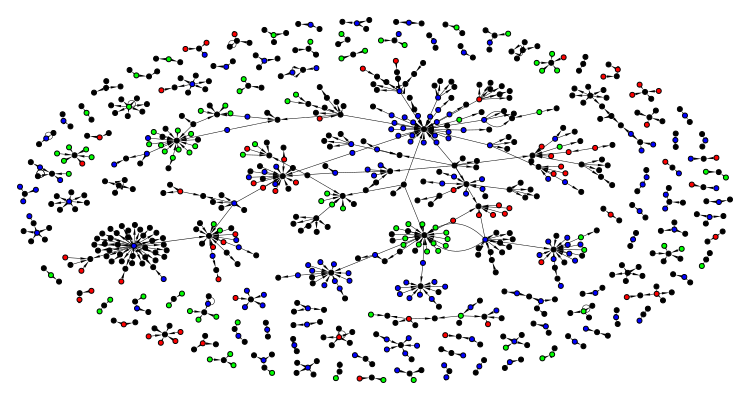

In [150]:
# Update the visual style to color nodes and edges based on the most frequent sentiment
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["layout"] = G_user_sub.layout("fr")
visual_style["bbox"] = (750, 400)
visual_style["margin"] = 20
visual_style["vertex_color"] = ['green' if most_frequent_sentiment.get(vertex['name'], 'sentiment') == 'positive' else 
                                'red' if most_frequent_sentiment.get(vertex['name'], 'sentiment') == 'negative' else 
                                'blue' if most_frequent_sentiment.get(vertex['name'], 'sentiment') == 'neutral' else 
                                'black' for vertex in G_user_sub.vs]

# Create a dictionary to map edge tuples to their sentiment
edge_sentiment_dict = {(s[1], s[2]): s[0] for s in sentiment_user}

# Update edge colors based on edge_sentiment_dict
visual_style["edge_color"] = ['green' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'sentiment') == 'positive' else 
                              'red' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'sentiment') == 'negative' else 
                              'blue' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'sentiment') == 'neutral' else 
                              'black' for edge in G_user_sub.es]

visual_style["edge_width"] = 0.5
visual_style["edge_arrow_size"] = 0.5
visual_style["edge_arrow_width"] = 0.5
visual_style["vertex_frame_color"] = 'black'
visual_style["vertex_shape"] = 'circle'

ig.plot(G_user_sub, **visual_style)


In [77]:
edge_sentiment_dict.get(('@.autarex', '@.autarex'))

'positive'

In [92]:
#print G_user_sub edges
for i in range(10):
    print(G_user_sub.es[i].tuple)
    print(G_user_sub.vs[G_user_sub.es[i].source]['name'])
    print(G_user_sub.vs[G_user_sub.es[i].target]['name'])

(0, 1)
@0bsidian____
@bambinoootalks
(0, 2)
@0bsidian____
@ms.mawma
(3, 4)
@0ctober.bby
@thesundaye
(5, 6)
@2peaceful2b_bothered
@jtee074
(5, 7)
@2peaceful2b_bothered
@littlezestyfosters
(5, 8)
@2peaceful2b_bothered
@justme_rachelle
(5, 9)
@2peaceful2b_bothered
@chiefnitro
(5, 10)
@2peaceful2b_bothered
@mainerboys
(11, 12)
@___slater
@bran__flakezz
(13, 14)
@_motivatedki
@kehlani


In [93]:
#access the username of the source node of the first edge in G_user_sub
G_user_sub.vs[G_user_sub.es[0].source]['name']

'@0bsidian____'

In [82]:
edge

'https://www.tiktok.com/@bearded_zaddy2/video/7363830267456343326,https://www.tiktok.com/@wisersmarterthinking/video/7363294356071075115\n'

In [87]:
edge_sentiment_dict.get((G_user_sub.vs[edge.source]['@.autarex'], G_user_sub.vs[edge.target]['@.autarex']))

AttributeError: 'str' object has no attribute 'source'

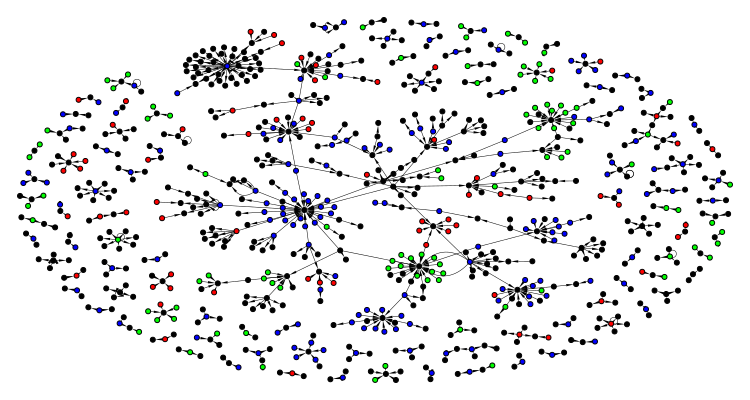

In [184]:
# edge_sentiment_dict and G_user_sub don't have the same edges, so we need to update the edges in G_user_sub to match the sentiment in edge_sentiment_dict
# Create a new list of edges with the usernames of the source and target, including sentiment from edge_sentiment_dict
new_edges = [(G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name'], edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'neutral')) for edge in G_user_sub.es]

# Create a new graph with the updated edges
G_user_sub = ig.Graph(directed=True)
all_vertices = list(set([v['name'] for v in G_user_sub.vs] + [v for edge in new_edges for v in edge[:2]]))
G_user_sub.add_vertices(all_vertices)
G_user_sub.add_edges([(s, t) for s, t, sentiment in new_edges])

# Update the visual style to color nodes and edges based on the most frequent sentiment
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["layout"] = G_user_sub.layout("fr")
visual_style["bbox"] = (750, 400)
visual_style["margin"] = 20
visual_style["vertex_color"] = ['green' if most_frequent_sentiment.get(vertex['name'], 'sentiment') == 'positive' else 
                                'red' if most_frequent_sentiment.get(vertex['name'], 'sentiment') == 'negative' else 
                                'blue' if most_frequent_sentiment.get(vertex['name'], 'sentiment') == 'neutral' else 
                                'black' for vertex in G_user_sub.vs]

# Create a dictionary to map edge tuples to their sentiment
edge_sentiment_dict = {(s[1], s[2]): s[0] for s in sentiment_user}

# Update edge colors based on edge_sentiment_dict
visual_style["edge_color"] = ['green' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'null') == 'positive' else 
                              'red' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'null') == 'negative' else 
                              'blue' if edge_sentiment_dict.get((G_user_sub.vs[edge.source]['name'], G_user_sub.vs[edge.target]['name']), 'null') == 'neutral' else 
                              'black' for edge in G_user_sub.es]

visual_style["edge_width"] = 0.5
visual_style["edge_arrow_size"] = 0.5
visual_style["edge_arrow_width"] = 0.5
visual_style["vertex_frame_color"] = 'black'
visual_style["vertex_shape"] = 'circle'

ig.plot(G_user_sub, **visual_style)
